[[29.6 66.8]
 [55.1 46.1]
 [43.2 16.7]]


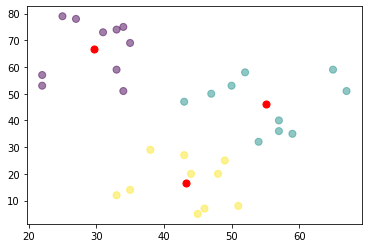

In [8]:
from pandas import DataFrame
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

Data = {'x': [25,34,22,27,33,33,31,22,35,34,67,54,57,43,50,57,59,52,65,47,49,48,35,33,44,45,38,43,51,46],
        'y': [79,51,53,78,59,74,73,57,69,75,51,32,40,47,53,36,35,58,59,50,25,20,14,12,20,5,29,27,8,7]
       }
  
df = DataFrame(Data,columns=['x','y'])
  
kmeans = KMeans(n_clusters=3).fit(df)
centroids = kmeans.cluster_centers_
print(centroids)

plt.scatter(df['x'], df['y'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

[[30.83333333 74.66666667]
 [43.2        16.7       ]
 [55.1        46.1       ]
 [27.75       55.        ]]


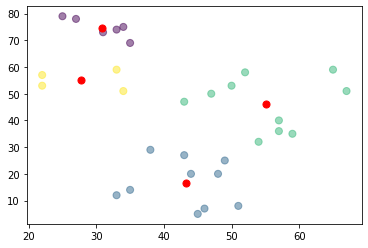

In [2]:
kmeans = KMeans(n_clusters=4).fit(df)
centroids = kmeans.cluster_centers_
print(centroids)

plt.scatter(df['x'], df['y'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

In [9]:
import tkinter as tk
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

root= tk.Tk()

canvas1 = tk.Canvas(root, width = 100, height = 100)
canvas1.pack()

label1 = tk.Label(root, text=centroids, justify = 'center')
canvas1.create_window(70, 50, window=label1)

figure1 = plt.Figure(figsize=(5,4), dpi=100)
ax1 = figure1.add_subplot(111)
ax1.scatter(df['x'], df['y'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
ax1.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
scatter1 = FigureCanvasTkAgg(figure1, root) 
scatter1.get_tk_widget().pack(side=tk.LEFT, fill=tk.BOTH)

root.mainloop()

In [4]:
from tkinter import filedialog
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

root= tk.Tk()

canvas1 = tk.Canvas(root, width = 400, height = 300,  relief = 'raised')
canvas1.pack()

label1 = tk.Label(root, text='k-Means Clustering')
label1.config(font=('helvetica', 14))
canvas1.create_window(200, 25, window=label1)

label2 = tk.Label(root, text='Type Number of Clusters:')
label2.config(font=('helvetica', 8))
canvas1.create_window(200, 120, window=label2)

entry1 = tk.Entry (root) 
canvas1.create_window(200, 140, window=entry1)

def getExcel ():
    
    global df
    import_file_path = filedialog.askopenfilename()
    read_file = pd.read_excel (import_file_path)
    df = DataFrame(read_file,columns=['x','y'])  
    
browseButtonExcel = tk.Button(text=" Import Excel File ", command=getExcel, bg='green', fg='white', font=('helvetica', 10, 'bold'))
canvas1.create_window(200, 70, window=browseButtonExcel)

def getKMeans ():
    global df
    global numberOfClusters
    numberOfClusters = int(entry1.get())
    
    kmeans = KMeans(n_clusters=numberOfClusters).fit(df)
    centroids = kmeans.cluster_centers_
    
    label3 = tk.Label(root, text= centroids)
    canvas1.create_window(200, 250, window=label3)
    
    figure1 = plt.Figure(figsize=(4,3), dpi=100)
    ax1 = figure1.add_subplot(111)
    ax1.scatter(df['x'], df['y'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
    ax1.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
    scatter1 = FigureCanvasTkAgg(figure1, root) 
    scatter1.get_tk_widget().pack(side=tk.RIGHT, fill=tk.BOTH)
    
processButton = tk.Button(text=' Process k-Means ', command=getKMeans, bg='brown', fg='white', font=('helvetica', 10, 'bold'))
canvas1.create_window(200, 170, window=processButton)

root.mainloop()

Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Program Data\envs\Tensorflow\lib\tkinter\__init__.py", line 1705, in __call__
    return self.func(*args)
  File "<ipython-input-4-02f7fa713459>", line 24, in getExcel
    read_file = pd.read_excel (import_file_path)
NameError: name 'pd' is not defined
Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Program Data\envs\Tensorflow\lib\tkinter\__init__.py", line 1705, in __call__
    return self.func(*args)
  File "<ipython-input-4-02f7fa713459>", line 33, in getKMeans
    numberOfClusters = int(entry1.get())
ValueError: invalid literal for int() with base 10: ''
Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Program Data\envs\Tensorflow\lib\tkinter\__init__.py", line 1705, in __call__
    return self.func(*args)
  File "<ipython-input-4-02f7fa713459>", line 33, in getKMeans
    numberOfClusters = int(entry1.get())
ValueError: invalid literal for int() with b

## Clustering e.g with GuassianMixture

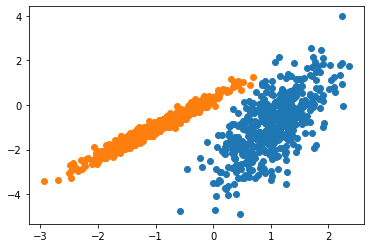

In [10]:
# gaussian mixture clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.mixture import GaussianMixture
from matplotlib import pyplot
# define dataset
X, _ = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)
# define the model
model = GaussianMixture(n_components=2)
# fit the model
model.fit(X)
# assign a cluster to each example
yhat = model.predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()

In [138]:
clusters

array([0, 1], dtype=int64)

## Clustering on Digit Dataset fron Sklearn

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

# The clustering can be performed as we did before:

kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits.data)
kmeans.cluster_centers_.shape

In [ ]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

In [ ]:
from scipy.stats import mode

labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels)

In [ ]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(digits.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [ ]:
from sklearn.manifold import TSNE

# Project the data: this step will take several seconds
tsne = TSNE(n_components=2, init='random', random_state=0)
digits_proj = tsne.fit_transform(digits.data)

# Compute the clusters
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits_proj)

# Permute the labels
labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

# Compute the accuracy
accuracy_score(digits.target, labels)

## Car Brand Clustering

In [24]:
# K-Means Clustering
# Importing the dataset
dataset = pd.read_csv('D:\\desktop files\\weka\\Datasets\\Prof Ugwu\\clustering_dataset\\cars.csv')


In [165]:
X = dataset.iloc[:,:-1].values
# X = np.array([X])
X = pd.DataFrame(X)

In [101]:
# dataset.head()
# label_column = dataset.iloc[:,7]
label_column.head()

0         US.
1     Europe.
2         US.
3         US.
4         US.
Name:  brand, dtype: object

In [118]:
label_column.value_counts()

 US.        162
 Japan.      51
 Europe.     48
Name:  brand, dtype: int64

In [170]:
df = X.replace(" ", np.nan)
df_means = df.mean()
X = df.fillna(df_means)
X.isnull().sum()

mpg             0
 cylinders      0
 cubicinches    0
 hp             0
 weightlbs      0
 time-to-60     0
year            0
dtype: int64

In [167]:
X = X.apply(pd.to_numeric, axis=0)
X.columns = ['mpg', ' cylinders', ' cubicinches', ' hp', ' weightlbs', ' time-to-60', 'year']
X.head(2)

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year
0,14.0,8,350.0,165,4209.0,12,1972
1,31.9,4,89.0,71,1925.0,14,1980


In [172]:
X.to_csv('D:\\desktop files\\weka\\Datasets\\Prof Ugwu\\clustering_dataset\\cars_for_cluster.csv')

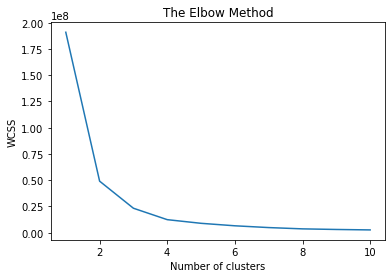

In [171]:
# Using the elbow method to find  the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


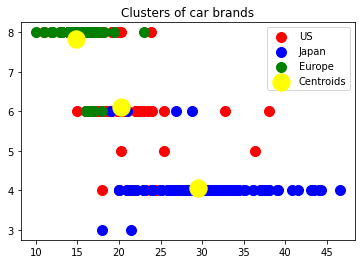

In [160]:

# Applying k-means to the cars dataset
kmeans = KMeans(n_clusters=3,init='k-means++',max_iter=300,n_init=10,random_state=0) 
# kmeans = KMeans(n_clusters=3,init='k-means++',max_iter=100,random_state=0) 

y_kmeans = kmeans.fit_predict(X)

# X = X.to_numpy()

# Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0,1],s=100,c='red',label='US')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1,1],s=100,c='blue',label='Japan')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2,1],s=100,c='green',label='Europe')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='yellow',label='Centroids')
plt.title('Clusters of car brands')
plt.legend()
plt.show()

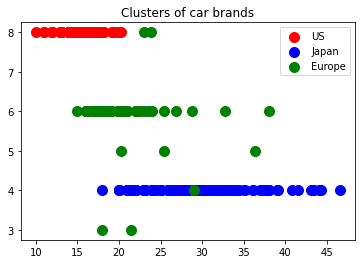

In [162]:
# Applying k-means to the cars dataset
# kmeans = KMeans(n_clusters=3,init='k-means++',max_iter=300,n_init=10,random_state=0) 
# kmeans = KMeans(n_clusters=3,init='k-means++',max_iter=100,random_state=0) 
gausmix = GaussianMixture(n_components=3)

y_gausmix = gausmix.fit_predict(X)

# X = X.to_numpy()

# Visualising the clusters
plt.scatter(X[y_gausmix == 0, 0], X[y_gausmix == 0,1],s=100,c='red',label='US')
plt.scatter(X[y_gausmix == 1, 0], X[y_gausmix == 1,1],s=100,c='blue',label='Japan')
plt.scatter(X[y_gausmix == 2, 0], X[y_gausmix == 2,1],s=100,c='green',label='Europe')
# plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='yellow',label='Centroids')
plt.title('Clusters of car brands')
plt.legend()
plt.show()

In [137]:
from sklearn.metrics import accuracy_score

labels = kmeans.labels_
accuracy_score(y_kmeans, labels)

# labels

1.0

In [ ]:
# print("vgood clusters")
# print(data.loc[data['acc'] == 'vgood']['cluster'].value_counts())  #get the frequency of each value in the 'cluster' attribute


In [ ]:
# cluster_1 = data.loc[data['cluster'] == 1]   #get only the datapoints with cluster value of 1
# cluster_1

### Sample of classification code in comparison to cluster performance

In [ ]:
onehot_data['acc'] = data['acc'].copy() #add class onto onehot encoded attributes

onehot_data['acc'] = onehot_data['acc'].astype('category')  #change to category datatype
onehot_data['acc'] = onehot_data['acc'].cat.codes  #change to int code

# Generate the training set.  Set random_state to be able to replicate results.
train = onehot_data.sample(frac=0.8, random_state=1)
# Select anything not in the training set and put it in the testing set.
test = onehot_data.loc[~onehot_data.index.isin(train.index)]

# Get all the columns from the dataframe.
columns = onehot_data.columns.tolist()
# Filter the columns to remove ones we don't want.
columns = [c for c in columns if c not in ["acc"]]

# Store the variable we'll be predicting on.
target = "acc"


from sklearn.ensemble import RandomForestClassifier

# Initialize the model with some parameters.
model = RandomForestClassifier(n_estimators=10, min_samples_leaf=5, random_state=1)
# Fit the model to the data.
model.fit(train[columns], train[target])
# Make predictions.
predictions = model.predict(test[columns])

#add the prediction column onto the test data to compare with actual class
test['prediction'] = predictions

In [ ]:
#calculate percentage of correct classifications
num_correct = 0
for (c, p) in zip(test['acc'],test['prediction']):
    if(c == p):
        num_correct += 1
        
percent_correct = num_correct/len(test)
print("Percent Classified Correctly: %.2f%%" % (percent_correct*100))

### Hierachy clustering/visualization with dendrogram

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

linked = linkage(X, 'single')

labelList = range(1, 11)

plt.figure(figsize=(10, 7))
dendrogram(linked,
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()

### Image Clustering

In [ ]:
# Note: this requires the ``pillow`` package to be installed
from sklearn.datasets import load_sample_image
china = load_sample_image("china.jpg")
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(china);

In [ ]:
china.shape


In [ ]:
data = china / 255.0 # use 0...1 scale
data = data.reshape(427 * 640, 3)
data.shape


In [ ]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data
    
    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T
    
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=20);
plot_pixels(data, title='Input color space: 16 million possible colors')

In [ ]:
import warnings; warnings.simplefilter('ignore')  # Fix NumPy issues.

from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data, colors=new_colors,
            title="Reduced color space: 16 colors")

In [ ]:
china_recolored = new_colors.reshape(china.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(china)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(china_recolored)
ax[1].set_title('16-color Image', size=16);